In [36]:
import numpy as np
import os
from scipy import signal
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
flower = Image.open("flower.png", 'r')

In [66]:
#flower.show()

In [67]:
flower_ar = np.array(flower)
image = flower_ar
flower_ar.shape

(240L, 320L, 4L)

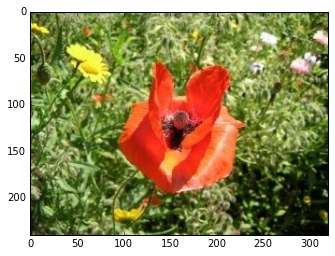

In [68]:
plt.imshow(flower_ar)

# Convolution

In [69]:
def convolve(image, weight):
    height, width = image.shape
    h, w = weight.shape
    height_new = height - h + 1
    width_new = width - h + 1
    image_new = np.zeros((height_new, width_new), dtype=np.float)
    for i in range(height_new):
        for j in range(width_new):
            image_new[i,j] = np.sum(image[i:i+h, j:j+h] * weight)
    image_new = image_new.clip(0,255)
    image_new = np.rint(image_new).astype('uint8')
    return image_new

In [70]:
def convolve_rgb(image, weight):
    print weight, 'R',
    R = convolve(image[:, :, 0], weight)
    print 'G',
    G = convolve(image[:, :, 1], weight)
    print 'B'
    B = convolve(image[:, :, 2], weight)
    I = np.stack((R, G, B), 2)
    return I

# Blur

In [51]:
kernel_blur = np.array(([0.0, 0.2, 0.0], 
                        [0.2, 0.2, 0.2],
                        [0.2, 0.2, 0.0]))

image_blur = convolve_rgb(flower_ar, kernel_blur)
image_blur.shape

[[ 0.   0.2  0. ]
 [ 0.2  0.2  0.2]
 [ 0.2  0.2  0. ]] R G B


(238L, 318L, 3L)

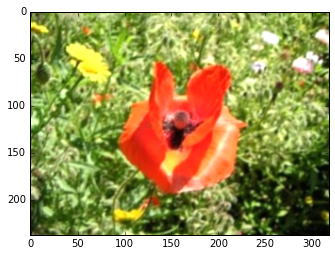

In [53]:
plt.imshow(image_blur)

# Motion Blur

In [87]:
kernel_mblur = np.array(([1, 0, 0], 
                         [0, 1, 0],
                         [0, 0, 1]))

In [88]:
image_mblur = convolve_rgb(flower_ar, kernel_mblur)

[[1 0 0]
 [0 1 0]
 [0 0 1]] R G B


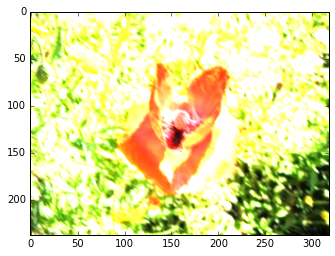

In [89]:
plt.imshow(image_mblur)

# Find Edges

In [75]:
kernel_edge = np.array(([0, 0, -1, 0, 0], 
                        [0, 0, -1, 0, 0], 
                        [0, 0, 2,  0, 0], 
                        [0, 0, 0,  0, 0], 
                        [0, 0, 0,  0, 0]))

In [76]:
image_edge = convolve_rgb(flower_ar, kernel_edge)

[[ 0  0 -1  0  0]
 [ 0  0 -1  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]] R G B


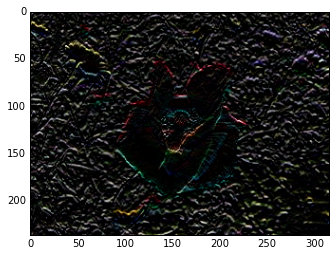

In [77]:
plt.imshow(image_edge)

In [90]:
kernel_edge = np.array(([0, 0, -1, 0, 0], 
                        [0, 0, -1, 0, 0], 
                        [0, 0, 4,  0, 0], 
                        [0, 0, -1, 0, 0], 
                        [0, 0, -1, 0, 0]))

In [91]:
image_edge = convolve_rgb(flower_ar, kernel_edge)

[[ 0  0 -1  0  0]
 [ 0  0 -1  0  0]
 [ 0  0  4  0  0]
 [ 0  0 -1  0  0]
 [ 0  0 -1  0  0]] R G B


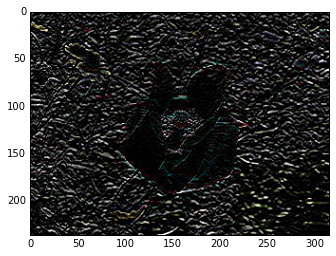

In [92]:
plt.imshow(image_edge)

In [93]:
kernel_edge = np.array(([-1, 0, 0, 0, 0], 
                        [0, -2, 0, 0, 0], 
                        [0, 0, 6,  0, 0], 
                        [0, 0, 0, -2, 0], 
                        [0, 0, 0, 0, -1]))

In [94]:
image_edge = convolve_rgb(flower_ar, kernel_edge)

[[-1  0  0  0  0]
 [ 0 -2  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 -2  0]
 [ 0  0  0  0 -1]] R G B


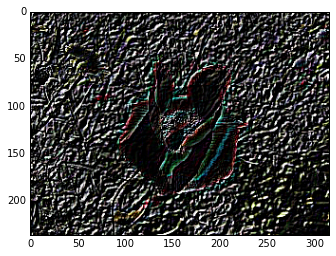

In [95]:
plt.imshow(image_edge)

In [96]:
kernel_edge = np.array(([-1, -1, -1], 
                        [-1, 8,  -1],
                        [-1, -1, -1] ))

In [97]:
image_edge = convolve_rgb(flower_ar, kernel_edge)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]] R G B


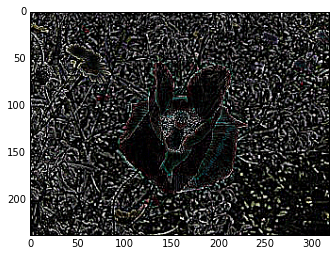

In [98]:
plt.imshow(image_edge)

# Sharpen

In [99]:
sharpen_edge = np.array(([-1, -1, -1], 
                         [-1, 9,  -1],
                         [-1, -1, -1] ))

In [102]:
image_sharpen = convolve_rgb(flower_ar, sharpen_edge)

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]] R G B


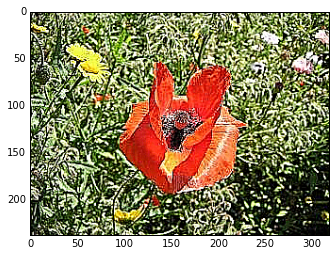

In [103]:
plt.imshow(image_sharpen)

[[-1 -1 -1 -1 -1]
 [-1  2  2  2 -1]
 [-1  2  8  2 -1]
 [-1  2  2  2 -1]
 [-1 -1 -1 -1 -1]] R G B


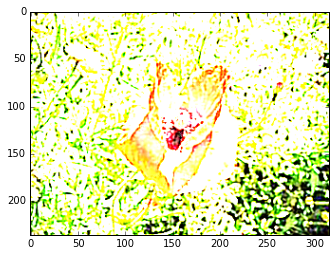

In [104]:
sharpen_edge = np.array(([-1, -1, -1, -1, -1], 
                         [-1, 2, 2, 2,    -1], 
                         [-1, 2, 8, 2,    -1], 
                         [-1, 2, 2, 2,    -1], 
                         [-1, -1, -1, -1, -1] ))

image_sharpen = convolve_rgb(flower_ar, sharpen_edge)
plt.imshow(image_sharpen)

[[ 1  1  1]
 [ 1 -7  1]
 [ 1  1  1]] R G B


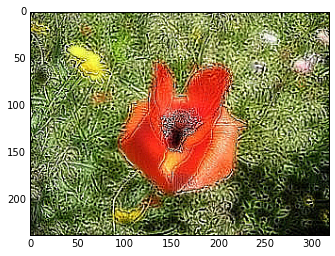

In [105]:
sharpen_edge = np.array(([1, 1, 1], 
                         [1, -7,1], 
                         [1, 1, 1]))

image_sharpen = convolve_rgb(flower_ar, sharpen_edge)
plt.imshow(image_sharpen)

# Emboss

[[-1 -1  0]
 [-1  0  1]
 [ 0  1  1]] R G B


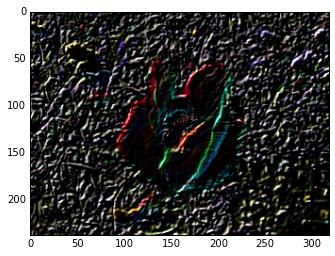

In [106]:
kernel_emboss = np.array(([-1, -1, 0],
                          [-1, 0,  1], 
                          [0, 1,   1]))

image_emboss = convolve_rgb(flower_ar, kernel_emboss)
plt.imshow(image_emboss)

[[-1 -1 -1 -1  0]
 [-1 -1 -1  0  1]
 [-1 -1  0  1  1]
 [-1  0  1  1  1]
 [ 0  1  1  1  1]] R G B


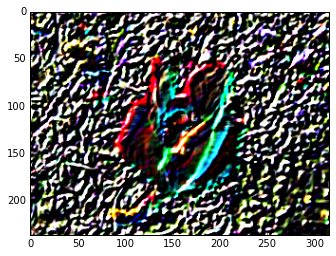

In [107]:
kernel_emboss = np.array(([-1, -1, -1, -1, 0], 
                          [-1, -1, -1, 0,  1], 
                          [-1, -1, 0, 1,   1], 
                          [-1, 0, 1, 1,    1], 
                          [0, 1, 1, 1,     1]))

image_emboss = convolve_rgb(flower_ar, kernel_emboss)
plt.imshow(image_emboss)

# EX

### convolve two one-dimensional sequences

In [4]:
np.convolve([1, 2, 3], [0, 1, 0.5])

array([ 0. ,  1. ,  2.5,  4. ,  1.5])

In [5]:
np.convolve([1,2,3], [0,1,0.5], 'same')

array([ 1. ,  2.5,  4. ])

In [6]:
np.convolve([1,2,3],[0,1,0.5], 'valid')

array([ 2.5])

### convolve two N-dimensional arrarys

In [8]:
from scipy import signal
sig = np.repeat([0., 1., 0.], 100)
win = signal.hann(50)
filtered = signal.convolve(sig, win, mode='same') / sum(win)
